In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('shampoo.csv',parse_dates=['Month'],index_col='Month')

<ipython-input-2-4ab3ba9c1a26>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('shampoo.csv',parse_dates=['Month'],index_col='Month')


In [3]:
df=df.sort_index(ascending=True)

In [4]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


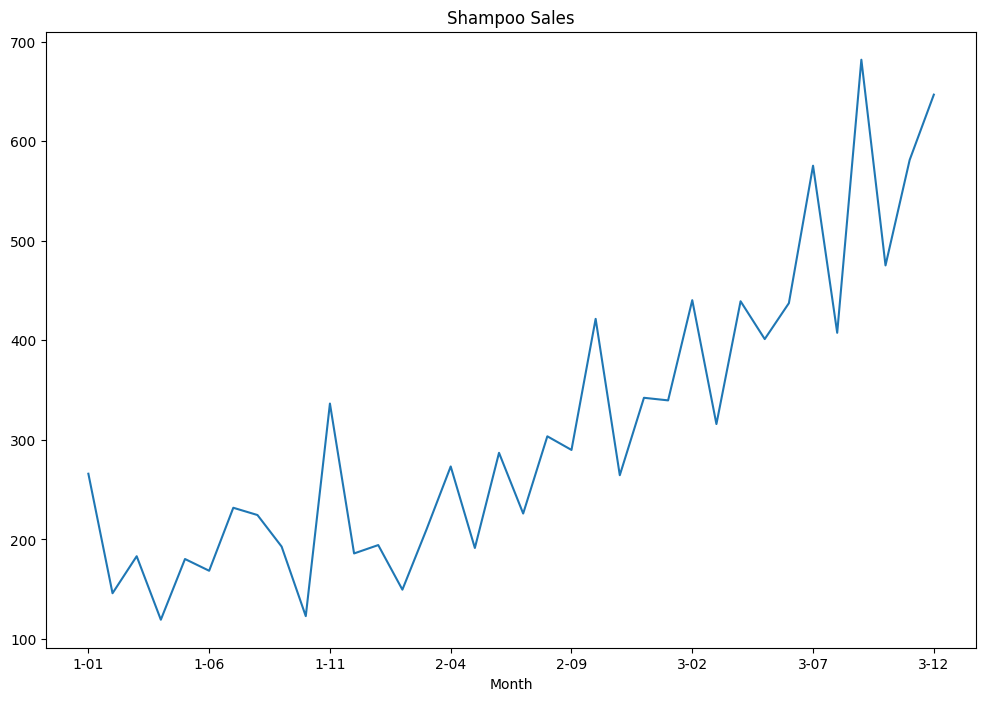

In [5]:
df['Sales'].plot(title='Shampoo Sales',figsize=(12,8))
plt.show()

In [16]:
##Multiplicative seaosnality

In [6]:
result = seasonal_decompose(df['Sales'], model='multiplicative', period=12)

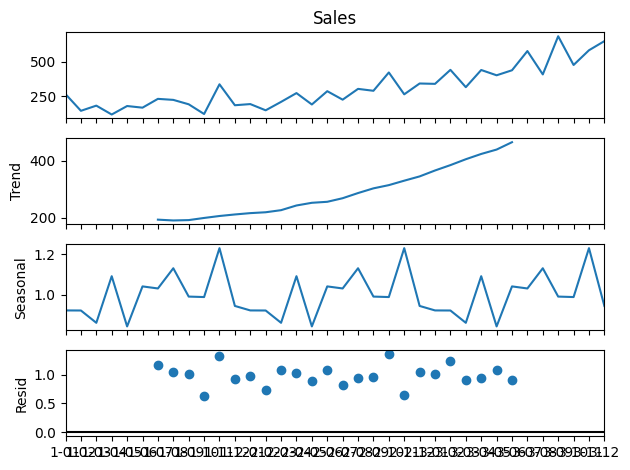

In [7]:
result.plot()
plt.show()

In [8]:
df['SMA_3'] = df['Sales'].rolling(window=3).mean()
df['SMA_6'] = df['Sales'].rolling(window=6).mean()
df['SMA_12']=df['Sales'].rolling(window=12).mean()

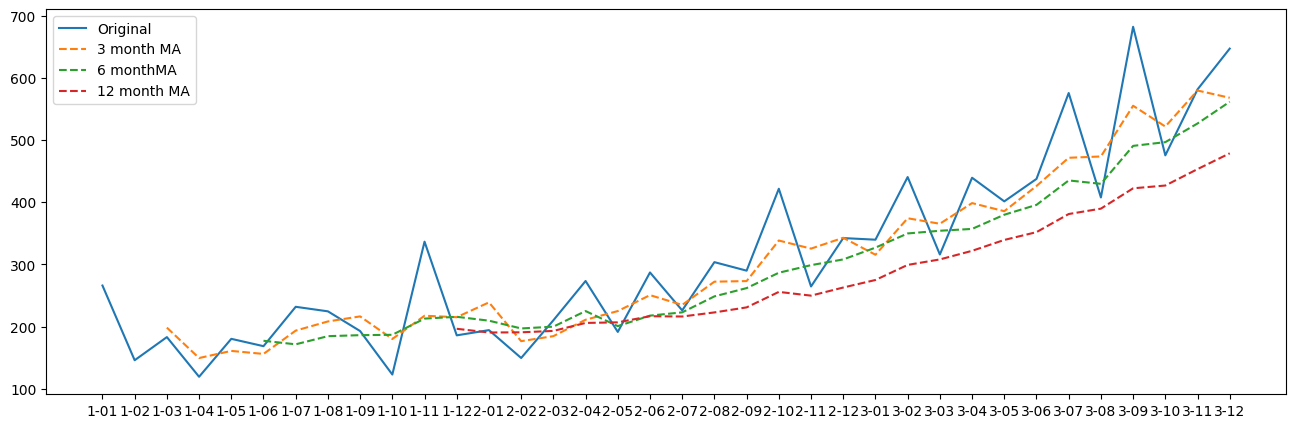

In [9]:
plt.figure(figsize=(16,5))
plt.plot(df['Sales'], label='Original')
plt.plot(df['SMA_3'], label='3 month MA', linestyle='dashed')
plt.plot(df['SMA_6'], label='6 monthMA', linestyle='dashed')
plt.plot(df['SMA_12'], label='12 month MA', linestyle='dashed')
plt.legend()
plt.show()

# Compare trends: Shorter MAs react faster; longer MAs reveal stable trends.

# direction of your data is upward, and longer MAs confirm a positive trend despite short-term volatility.

## Exponential Smoothing (Single, Double, Triple)

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [10]:
series = df["Sales"]
model_ses = SimpleExpSmoothing(series).fit()
forecast_ses = model_ses.forecast(12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a sup

In [11]:
series = df["Sales"]
model_des=ExponentialSmoothing(series,trend='mul',seasonal=None).fit()
forecast_des=model_des.forecast(12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a sup

In [12]:
series=df["Sales"]
model_tes=ExponentialSmoothing(series,trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_tes=model_tes.forecast(12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sta

In [13]:
actual = df["Sales"][-12:]

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
print("MAE - SES:", mean_absolute_error(actual, forecast_ses))
print("MAE - DES:", mean_absolute_error(actual, forecast_des))
print("MAE - TES:", mean_absolute_error(actual, forecast_tes))

# MSE
print("MSE - SES:", mean_squared_error(actual, forecast_ses))
print("MSE - DES:", mean_squared_error(actual, forecast_des))
print("MSE - TES:", mean_squared_error(actual, forecast_tes))

# RMSE
print("RMSE - SES:", np.sqrt(mean_squared_error(actual, forecast_ses)))
print("RMSE - DES:", np.sqrt(mean_squared_error(actual, forecast_des)))
print("RMSE - TES:", np.sqrt(mean_squared_error(actual, forecast_tes)))


MAE - SES: 134.0921527687763
MAE - DES: 429.41884651639816
MAE - TES: 276.45942756637055
MSE - SES: 24298.540427297616
MSE - DES: 196654.3948447078
MSE - TES: 81671.33884945458
RMSE - SES: 155.87989102927168
RMSE - DES: 443.45732020647466
RMSE - TES: 285.78197782480015


In [43]:
# R² Score
print("R² Score - SES:", r2_score(actual, forecast_ses))
print("R² Score - DES:", r2_score(actual, forecast_des))
print("R² Score - TES:", r2_score(actual, forecast_tes))

R² Score - SES: -0.9293977021158639
R² Score - DES: -14.615116416544494
R² Score - TES: -5.48501888318519


In [48]:
df.head()

,Sales,SMA_3,SMA_6,SMA_12
Month,,,,
1-01,266.0,NaN,NaN,NaN
1-02,145.9,NaN,NaN,NaN
1-03,183.1,198.333333,NaN,NaN
1-04,119.3,149.433333,NaN,NaN
1-05,180.3,160.900000,NaN,NaN


In [50]:
print(df.columns)

Index(['Sales', 'SMA_3', 'SMA_6', 'SMA_12'], dtype='object')


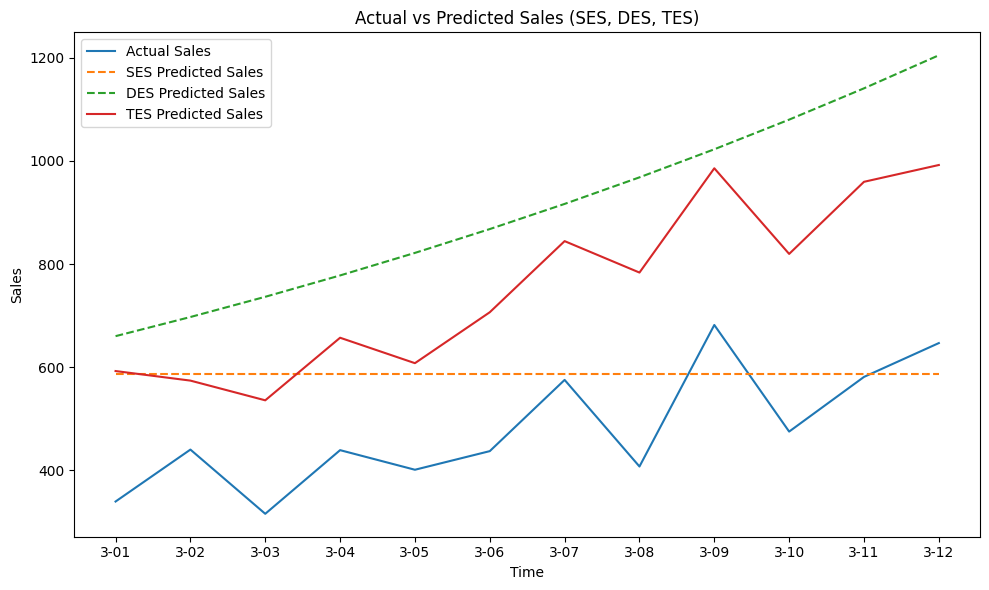

In [21]:
# Plotting Actual vs Predicted for all models on a single plot
plt.figure(figsize=(10, 6))

# Plot actual sales
plt.plot(actual.index, actual, label="Actual Sales", linestyle='-')

# Plot SES predictions
plt.plot(actual.index, forecast_ses, label="SES Predicted Sales",linestyle='dashed' )

# Plot DES predictions
plt.plot(actual.index, forecast_des, label="DES Predicted Sales" ,linestyle='dashed')

# Plot TES predictions
plt.plot(actual.index, forecast_tes, label="TES Predicted Sales",  linestyle='-')

plt.title("Actual vs Predicted Sales (SES, DES, TES)")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()


plt.tight_layout()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
df['Month'] = np.arange(len(df))

In [54]:
X = df[['Month']]
y = df['Sales']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [58]:
m = LinearRegression().fit(X_train, y_train)
df['Regression_Pred'] = m.predict(X)

In [59]:
y_pred = m.predict(X_test)
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 126.44
Mean Squared Error (MSE): 24420.07
Root Mean Squared Error (RMSE): 156.27
R-squared: -1.31


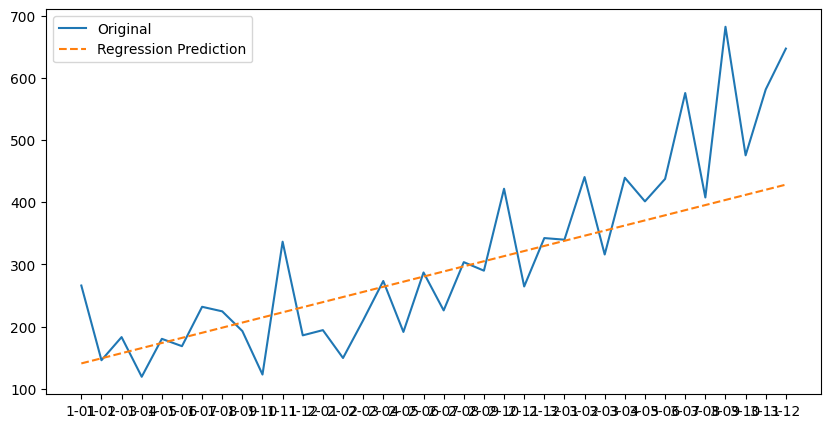

In [60]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original')
plt.plot(df['Regression_Pred'], label='Regression Prediction',
linestyle='dashed')
plt.legend()
plt.show()

In [ ]:
## Autoregressive (AR) Model

In [32]:
df = df.reset_index(drop=True)

In [33]:
from statsmodels.tsa.ar_model import AutoReg

In [37]:
model_ar = AutoReg(df['Sales'], lags=5).fit()
df['AR_Pred'] = model_ar.predict(start=0, end=len(df)-1)

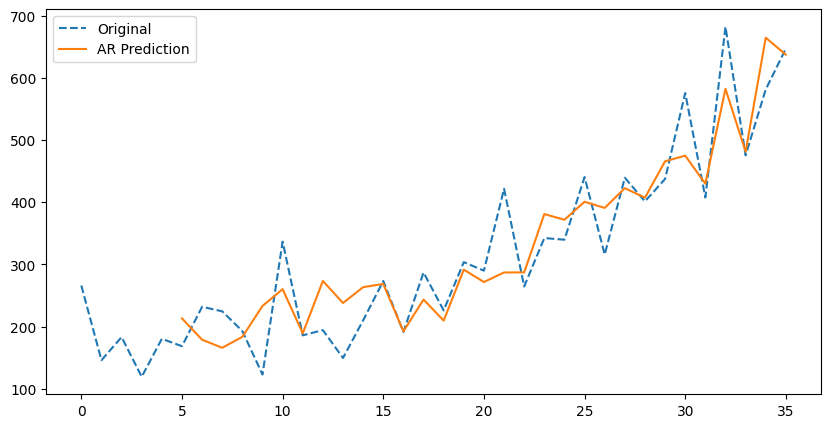

In [38]:
plt.figure(figsize=(10, 5))

# Original series
plt.plot(df['Sales'], label='Original', linestyle='--')

# Prediction line (only where not NaN)
plt.plot(df['AR_Pred'], label='AR Prediction', linestyle='-')

plt.legend()
plt.show()


In [43]:
df.isnull().sum()

,0
Sales,0
SMA_3,2
SMA_6,5
SMA_12,11
AR_Pred,5


In [44]:
df.dropna(subset=['Sales', 'AR_Pred'], inplace=True)

In [45]:
df_eval = df.dropna(subset=['Sales', 'AR_Pred'])

r2 = r2_score(df_eval['Sales'], df['AR_Pred'])
rmse = np.sqrt(mean_squared_error(df_eval['Sales'], df_eval['AR_Pred']))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8441327804391798
RMSE: 57.622220396490775


In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [88]:
model_ma = ARIMA(df['Sales'], order=(0, 0, 2)).fit()
df['MA_Pred'] = model_ma.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

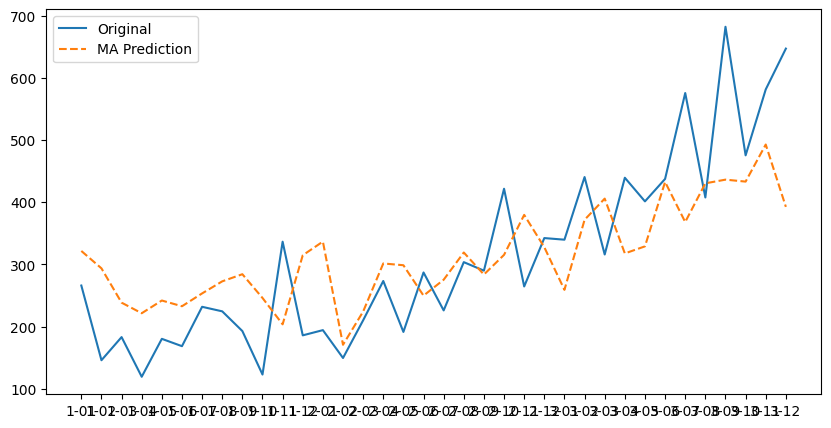

In [90]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original')
plt.plot(df['MA_Pred'], label='MA Prediction')
plt.legend()
plt.show()

In [95]:
r2 = r2_score(df_eval['Sales'], df_eval['MA_Pred'])
rmse = np.sqrt(mean_squared_error(df_eval['Sales'], df_eval['MA_Pred']))
print("R² Score for MA model:", r2)
print("RMSE for MA model:", rmse)

R² Score for MA model: 0.5020606970687
RMSE for MA model: 103.62726964467545
